In [170]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [86]:
sales_data = pd.read_csv('retail_sales.csv')
sales_data['date']=pd.to_datetime(sales_data['date'])
sales_data.set_index('date', inplace=True)

In [87]:
sales_data.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


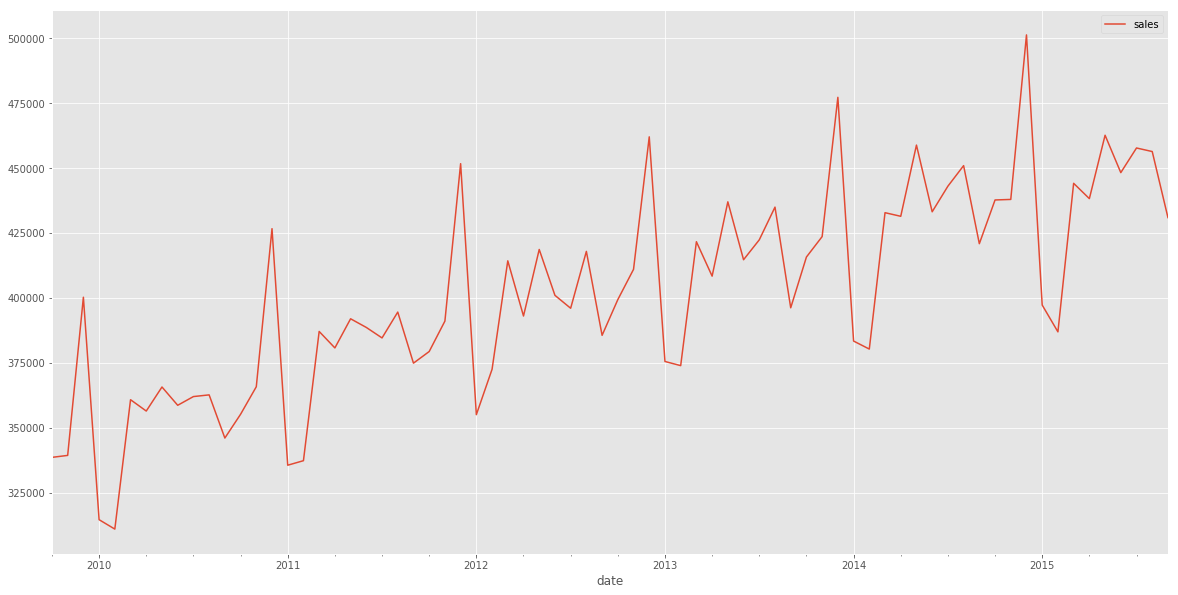

In [88]:
sales_data.plot()

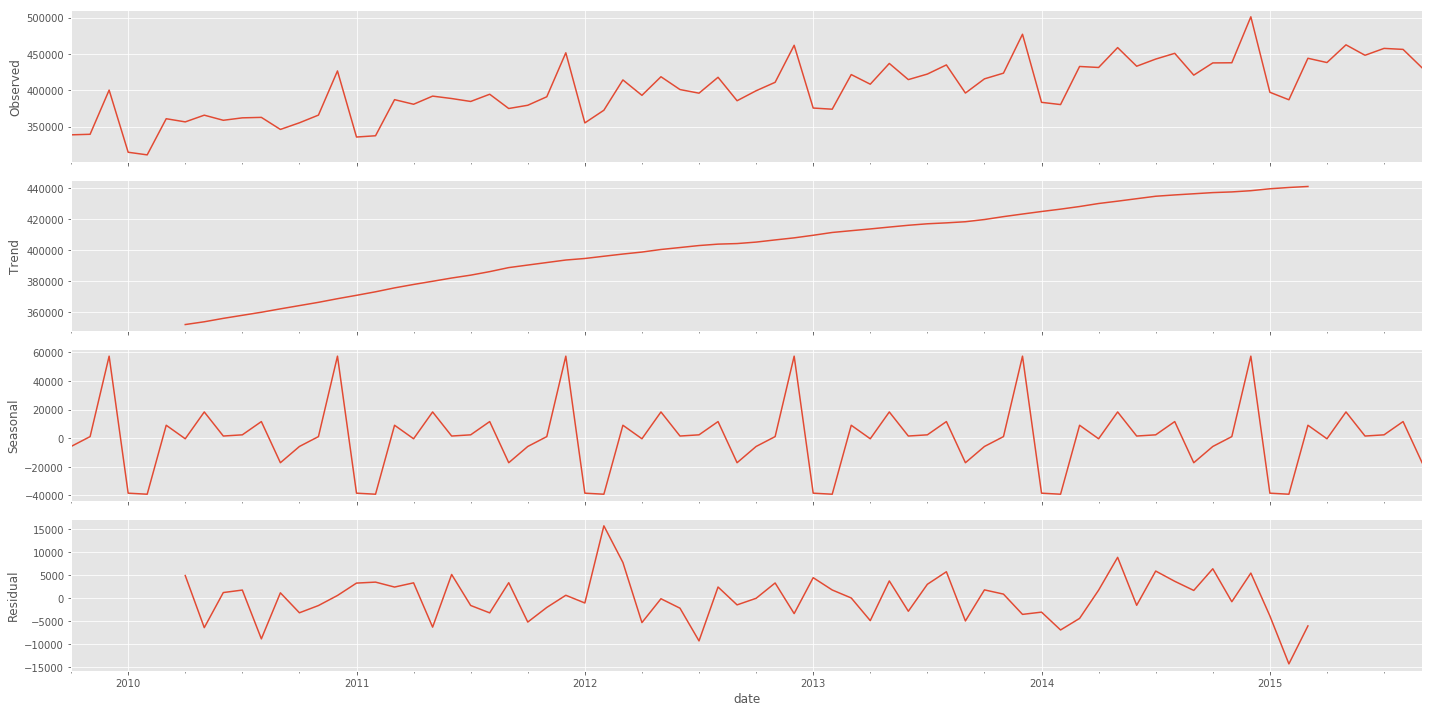

In [89]:
decomposed = seasonal_decompose(sales_data['sales'], model='additive')
x =decomposed.plot() #See note below about this

In [90]:
sales_data['stationary']=sales_data['sales'].diff()


In [91]:
sales_data.head()

,sales,stationary
date,,
2009-10-01,338630,NaN
2009-11-01,339386,756.0
2009-12-01,400264,60878.0
2010-01-01,314640,-85624.0
2010-02-01,311022,-3618.0


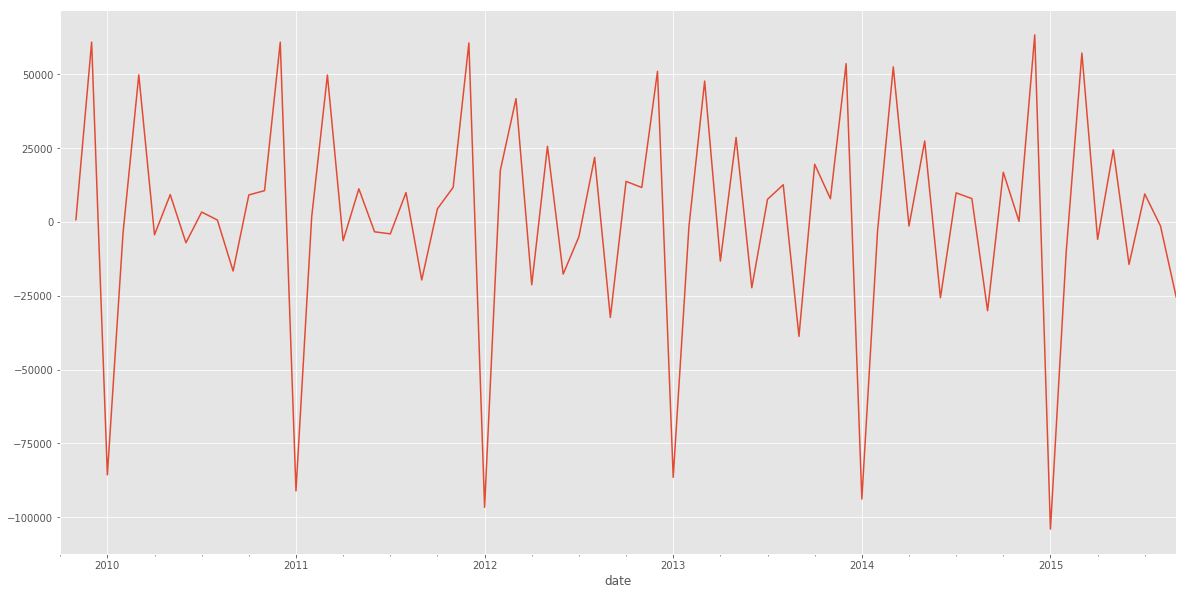

In [92]:
sales_data['stationary'].plot()

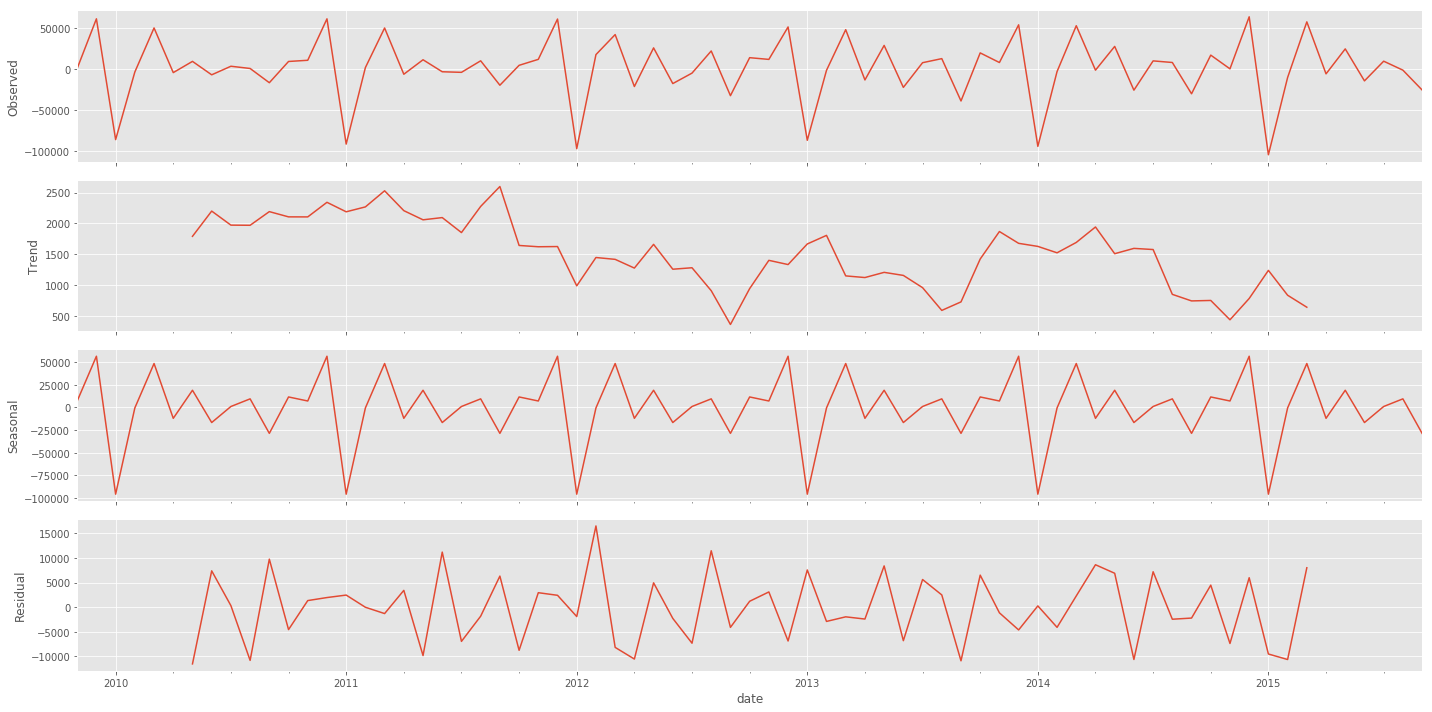

In [93]:
decomposed = seasonal_decompose(sales_data['stationary'].dropna(), model='additive')
x =decomposed.plot() #See note below about this

/vagrant/pythondata/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


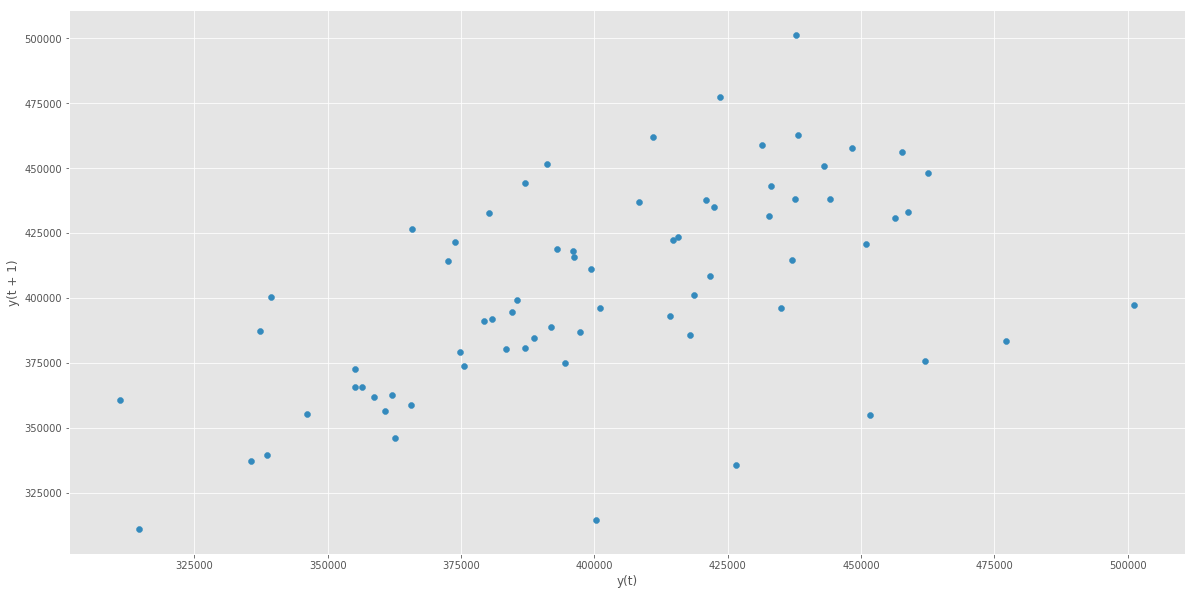

In [97]:
pd.tools.plotting.lag_plot(sales_data['sales'])

/vagrant/pythondata/env/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


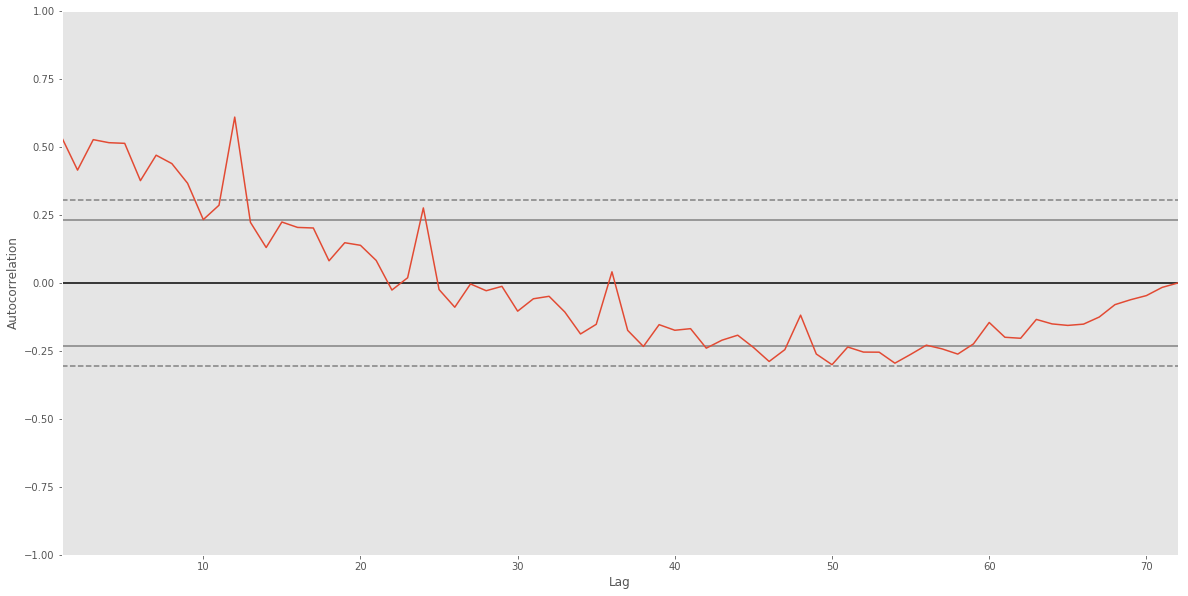

In [102]:

pd.tools.plotting.autocorrelation_plot(sales_data['sales'])

In [108]:
sales_data['sales'].corr(sales_data['sales'].shift(12))

0.97909859758957896

In [123]:
#create train/test datasets
X = sales_data['stationary'].dropna()

train_data = X[1:len(X)-12]
test_data = X[X[len(X)-12:]]


In [125]:
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()


/vagrant/pythondata/env/local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [127]:
print('The lag value chose is: %s' % model_fitted.k_ar)


The lag value chose is: 10


In [130]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const             7720.952626
L1.stationary       -1.297636
L2.stationary       -1.574980
L3.stationary       -1.403045
L4.stationary       -1.123204
L5.stationary       -0.472200
L6.stationary       -0.014586
L7.stationary        0.564099
L8.stationary        0.792080
L9.stationary        0.843242
L10.stationary       0.395546
dtype: float64


In [165]:
# make predictions 
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [sales_data['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

In [162]:
compare_df

,actual,predicted
date,,
2014-10-01,16831.0,5601.811846
2014-11-01,208.0,38414.120561
2014-12-01,63322.0,35441.708285
2015-01-01,-103980.0,-49947.389001
2015-02-01,-10317.0,-21617.841678
2015-03-01,57175.0,20818.987209
2015-04-01,-5893.0,14274.367772
2015-05-01,24398.0,15474.495929
2015-06-01,-14386.0,-12799.912704


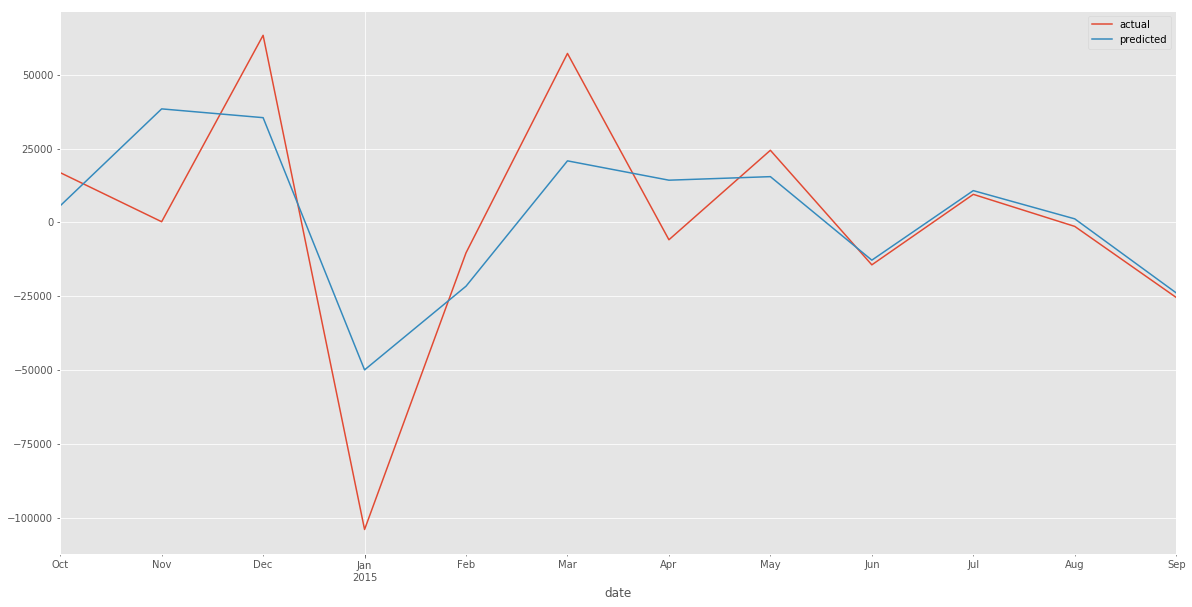

In [163]:
compare_df.plot()

In [167]:
r2 = r2_score(sales_data['stationary'].tail(12), predictions)

In [169]:
r2

0.63927217684780879